# Regularization Techniques: L1 and L2

<img src="https://www.nomidl.com/wp-content/uploads/2023/08/regull.png" height=500 width=500>

## Understanding Overfitting in Machine Learning

**Overfitting** occurs when a model learns the training data too well, capturing noise along with the underlying pattern. This leads to poor performance on unseen data, as the model's flexibility makes it sensitive to small fluctuations in the dataset.

## The Concept of Regularization: An Overview

**Regularization** is a technique used to prevent overfitting by adding a penalty term to the loss function. This penalty term constrains the magnitude of model coefficients, discouraging overly complex models. Regularization techniques like L1 and L2 achieve this by adding different types of penalties.

In [3]:
0.4 ** 2

0.16000000000000003

## L1 Regularization (Lasso Regression): Theory and Applications

> L1 Regularization, also known as Lasso Regression, adds a penalty equal to the absolute value of the magnitude of coefficients. This can lead to some coefficients being exactly zero, which implies feature selection.

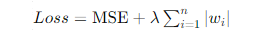

In [4]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
od.download('https://www.kaggle.com/datasets/yasserh/walmart-dataset')

Skipping, found downloaded files in "./walmart-dataset" (use force=True to force download)


In [6]:
df = pd.read_csv('walmart-dataset/Walmart.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.corr()

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_671/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_671/2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [12]:
df = df.drop('Date',axis=1)

In [13]:
inputs = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year']

In [14]:
target = 'Weekly_Sales'

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
train_df, val_df = train_test_split(train_val_df,test_size=0.25,random_state=42)

In [19]:
train_inputs = train_df[inputs]
train_target = train_df[target]

In [20]:
val_inputs = val_df[inputs]
val_target = val_df[target]

In [21]:
test_inputs = test_df[inputs]
test_target = test_df[target]

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
numerics = list(df[inputs].select_dtypes(np.number).columns)

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(df[numerics])

StandardScaler()

In [26]:
train_inputs[numerics] = scaler.transform(train_inputs[numerics])
val_inputs[numerics] = scaler.transform(val_inputs[numerics])
test_inputs[numerics] = scaler.transform(test_inputs[numerics])

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_671/4072025852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[numerics] = scaler.transform(train_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_671/4072025852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[numerics] = scaler.transform(val_inputs[numerics])
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_671/4072025852.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [28]:
from sklearn.linear_model import Lasso

In [32]:
model = Lasso(alpha=1.0)

In [33]:
model.fit(train_inputs[numerics], train_target)

Lasso()

In [ ]:
#lasso.score

In [40]:
#logistic regression - linear equation + sigmoid function, decision tree classifier - entropy 

In [41]:
print("Training score:", model.score(train_inputs[numerics], train_target))
print("Val score:", model.score(val_inputs[numerics], val_target))

Training score: 0.1485082840608949
Val score: 0.13346349642454103


- `lasso = Lasso(alpha=1.0)`: This line initializes a Lasso regression model with a regularization parameter (alpha) set to 1.0. Lasso regression is a linear regression technique that includes a penalty term to prevent overfitting by shrinking the coefficients towards zero.
- `lasso.fit(X_train, y_train)`: This line fits (trains) the Lasso regression model using the training data (X_train and y_train). The model learns the relationship between the features (X) and the target variable (y).
- `lasso.score()`: This line prints the R-squared score of the model on the training data. The R-squared score measures how well the model fits the training data, with values closer to 1 indicating a better fit.

## L2 Regularization (Ridge Regression): Theory and Applications

> L2 Regularization, also known as Ridge Regression, adds a penalty equal to the square of the magnitude of coefficients. Unlike L1, it does not reduce coefficients to zero but significantly reduces their impact.

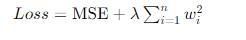

In [42]:
from sklearn.linear_model import Ridge

In [43]:
model = Ridge(alpha=1.0)

In [44]:
# Fit model
model.fit(train_inputs[numerics], train_target)

Ridge()

In [45]:
print("Training score:", model.score(train_inputs[numerics], train_target))
print("Test score:", model.score(val_inputs[numerics], val_target))

Training score: 0.1485082840608949
Test score: 0.13346349642454103


- `ridge = Ridge(alpha=1.0)`: This line initializes a Ridge regression model with a regularization parameter (alpha) set to 1.0. Ridge regression is a linear regression technique that includes a penalty term to prevent overfitting by shrinking the coefficients towards zero.

### Comparison of L1 vs. L2 Regularization: When to Use Each
- **L1 Regularization (Lasso):** Preferred when we aim for sparse models, i.e., when we have a high number of features, but we expect only a few of them to be important.
- **L2 Regularization (Ridge):** Useful when we have collinear (correlated) features, as it will distribute the coefficient values among them.

<img src="https://miro.medium.com/v2/resize:fit:658/1*JunW1x86S_v-lG8_jvLc1Q.png" height=500 width=500>

### Regularization in Ensemble Models
Regularization principles also extend to ensemble models like Random Forest and Gradient Boosting. For instance, XGBoost incorporates both L1 and L2 regularization, making it an effective tool against overfitting in complex datasets.

### Real-World Case Studies
- **Netflix Prize:** Techniques including L1 and L2 regularization were pivotal in the development of collaborative filtering models for movie recommendations.
- **Credit Scoring Models:** L1 regularization has been utilized to select meaningful features from vast datasets, improving the prediction of default rates.